In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics 

In [2]:
data=pd.read_csv('Sales_add.csv')
data.head()

,Month,Region,Manager,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
0,Month-1,Region - A,Manager - A,132921,270390
1,Month-2,Region - A,Manager - C,149559,223334
2,Month-3,Region - B,Manager - A,146278,244243
3,Month-4,Region - B,Manager - B,152167,231808
4,Month-5,Region - C,Manager - B,159525,258402


In [3]:
data.describe()

,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
count,22.000000,22.000000
mean,149239.954545,231123.727273
std,14844.042921,25556.777061
min,130263.000000,187305.000000
25%,138087.750000,214960.750000
50%,147444.000000,229986.500000
75%,157627.500000,250909.000000
max,178939.000000,276279.000000


There ara 22 rows and 5 columns

# The company wishes to clarify whether there is any increase in sales after stepping into digital marketing.

In [4]:
#Hypothisis:
#Null hypothisi H0 : There is no change in sales after stepping into digital marketing
#Alt hypothesis Ha : There is a hike in the sales after stepping into digital marketing

In [5]:
#alpha=0.05

In [6]:
from scipy.stats import ttest_ind

In [7]:
bdm_s=data['Sales_before_digital_add(in $)']
adm_s=data['Sales_After_digital_add(in $)']
alpha=.05           

In [8]:
_,p = ttest_ind(bdm_s,adm_s)
print("p value :", p)
if p < alpha:
    print("Reject H0")
else:
    print("Fail to reject H0.")

p value : 2.614368006904645e-16
Reject H0


According to the hypthesis p value > alpha 0.05
thus, there is hike in the sales after stepping into digital marketing

Text(0, 0.5, ' Sales')

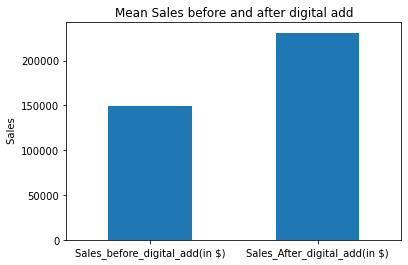

In [10]:
data1=data.mean(numeric_only=True)
data1.plot(kind='bar')
plt.title('Mean Sales before and after digital add')
plt.xticks(rotation=0)
plt.ylabel(' Sales')

# .The company needs to check whether there is any dependency between thefeatures “Region” and “Manager”.


In [11]:
#Hypothisis
#Null Hypothisis #H0 = Region and manager are Independent
#Alt Hypothisi #Ha = Region and manager are Dependent

In [20]:
reg=data['Region']
manager=data['Manager']

In [21]:
Crosstab=pd.crosstab(reg,manager)
Crosstab

Manager,Manager - A,Manager - B,Manager - C
Region,,,
Region - A,4,3,3
Region - B,4,1,2
Region - C,1,3,1


In [23]:
#library for chi square test
from scipy.stats import chi2_contingency

In [28]:
chi_value,P_value,df,exp=chi2_contingency(Crosstab)
P_value

0.5493991051158094

In [27]:
if P_value>alpha:
    print("Failing to Reject H0")
else:
    print("reject H0")

Failing to Reject H0


since p value > alpha 0.05,therefore we accept the null hypothisis i.e region and manager are dependednt